In [1]:
# Importing lIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/drive")
import sys
sys.path.append('/content/drive/My Drive/')
import utils
import plot_utils
import nse_utils




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# File paths
anto_file = ("/content/drive/MyDrive/Datasets/raw/raw/ANTO2_USGS.txt")
plvo_file = ("/content/drive/MyDrive/Datasets/raw/raw/PLVO2_USGS.txt")
anto_file_sim = ("/content/drive/MyDrive/Datasets/raw/raw/ANTO2_sim.txt")
plvo_file_sim = ("/content/drive/MyDrive/Datasets/raw/raw/PLVO2_sim.txt")

In [3]:
# Read and preprocess the USGS data
df_anto = utils.read_usgs_data(anto_file, header_line=33)
df_plvo = utils.read_usgs_data(plvo_file, header_line=32)

# Read and preprocess simulation data
df_anto_sim = utils.read_simulation_data(anto_file_sim, header_line=6)
df_plvo_sim = utils.read_simulation_data(plvo_file_sim, header_line=6)


In [4]:
df_anto.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality
212524,USGS,7336200,2007-01-01 00:00:00+00:00,CST,18400.0,A:[91]
212525,USGS,7336200,2007-01-01 01:00:00+00:00,CST,17600.0,A:[91]
212526,USGS,7336200,2007-01-01 02:00:00+00:00,CST,16800.0,A:[91]
212527,USGS,7336200,2007-01-01 03:00:00+00:00,CST,16000.0,A:[91]
212528,USGS,7336200,2007-01-01 04:00:00+00:00,CST,15200.0,A:[91]


In [5]:
df_plvo.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality
134473,USGS,7328500,2007-01-01 00:00:00+00:00,CST,355.0,A:[91]
134474,USGS,7328500,2007-01-01 01:00:00+00:00,CST,355.0,A:[91]
134475,USGS,7328500,2007-01-01 02:00:00+00:00,CST,355.0,A:[91]
134476,USGS,7328500,2007-01-01 03:00:00+00:00,CST,355.0,A:[91]
134477,USGS,7328500,2007-01-01 04:00:00+00:00,CST,355.0,A:[91]


In [6]:
df_anto_sim.head()

,datetime,Sim_Discharge
78314,2007-01-01 00:00:00-06:00,8404
78315,2007-01-01 06:00:00-06:00,7821
78316,2007-01-01 12:00:00-06:00,7006
78317,2007-01-01 18:00:00-06:00,6090
78318,2007-01-02 00:00:00-06:00,5257


In [7]:
df_plvo_sim.head()

,datetime,Sim_Discharge
78314,2007-01-01 00:00:00-06:00,504
78315,2007-01-01 06:00:00-06:00,556
78316,2007-01-01 12:00:00-06:00,561
78317,2007-01-01 18:00:00-06:00,514
78318,2007-01-02 00:00:00-06:00,450


In [8]:
# Merge df_anto and df_anto_sim
df_anto_merged = pd.merge(df_anto, df_anto_sim, on='datetime', how='inner')

# Merge df_plvo and df_plvo_sim
df_plvo_merged = pd.merge(df_plvo, df_plvo_sim, on='datetime', how='inner')


In [9]:
# Check for missing values in df_anto_merged
missing_values_anto = df_anto_merged.isnull().sum()

# Check for missing values in df_plvo_merged
missing_values_plvo = df_plvo_merged.isnull().sum()

# Print the number of missing values for each station
print("Number of missing values in df_anto_merged:")
print(missing_values_anto)

print("\nNumber of missing values in df_plvo_merged:")
print(missing_values_plvo)


Number of missing values in df_anto_merged:
org               0
site_num          0
datetime          0
timezone          0
USGS_Discharge    0
quality           0
Sim_Discharge     0
dtype: int64

Number of missing values in df_plvo_merged:
org               0
site_num          0
datetime          0
timezone          0
USGS_Discharge    0
quality           0
Sim_Discharge     0
dtype: int64


In [10]:
df_anto_merged.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7336200,2007-01-01 06:00:00+00:00,CST,13900.0,A:[91],8404
1,USGS,7336200,2007-01-01 12:00:00+00:00,CST,10100.0,A:[91],7821
2,USGS,7336200,2007-01-01 18:00:00+00:00,CST,6870.0,A:[91],7006
3,USGS,7336200,2007-01-02 00:00:00+00:00,CST,5080.0,A:[91],6090
4,USGS,7336200,2007-01-02 06:00:00+00:00,CST,4180.0,A:[91],5257


In [11]:
df_plvo_merged.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7328500,2007-01-01 06:00:00+00:00,CST,355.0,A:[91],504
1,USGS,7328500,2007-01-01 12:00:00+00:00,CST,351.0,A:[91],556
2,USGS,7328500,2007-01-01 18:00:00+00:00,CST,329.0,A:[91],561
3,USGS,7328500,2007-01-02 00:00:00+00:00,CST,317.0,A:[91],514
4,USGS,7328500,2007-01-02 06:00:00+00:00,CST,310.0,A:[91],450


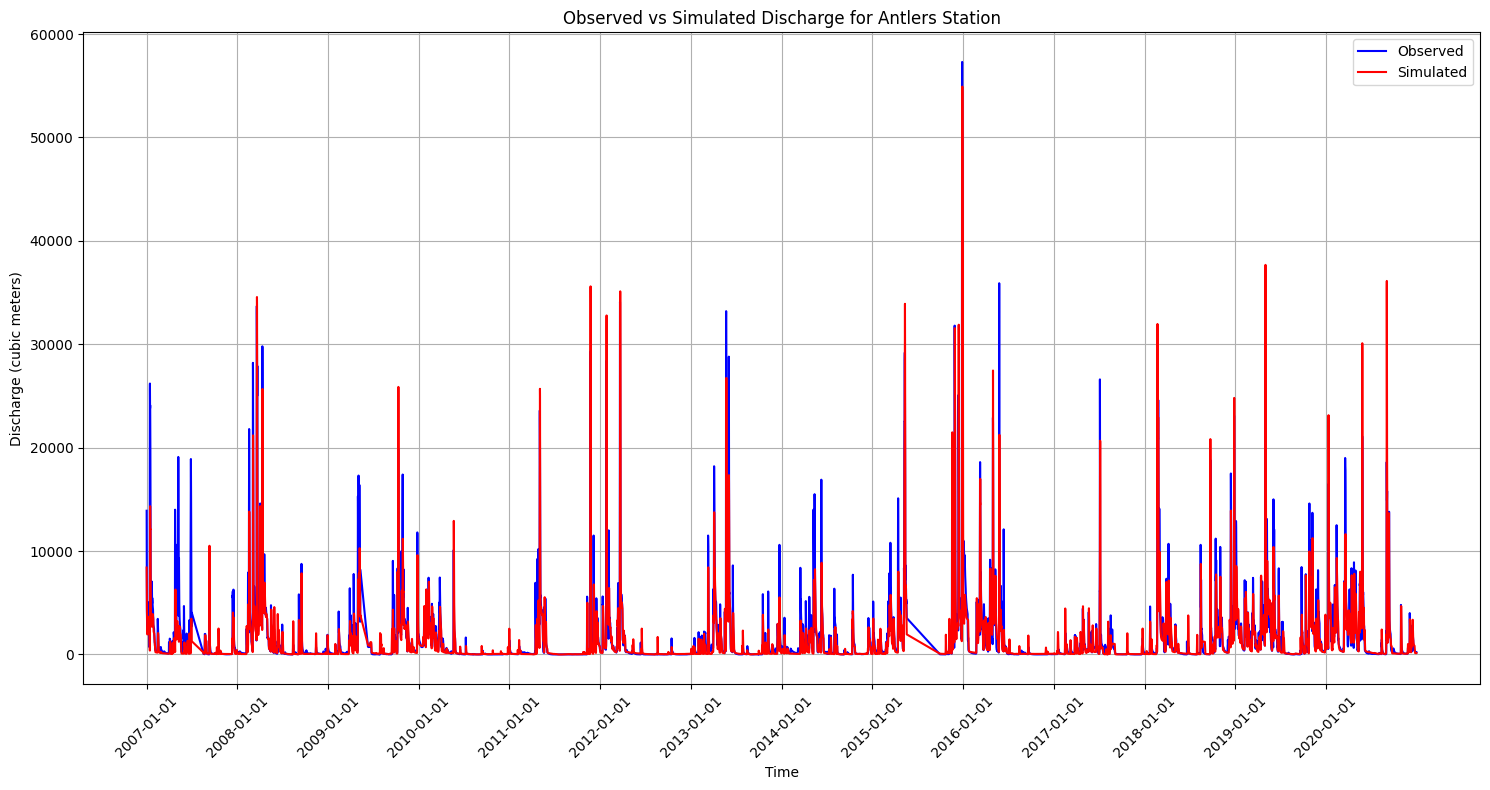

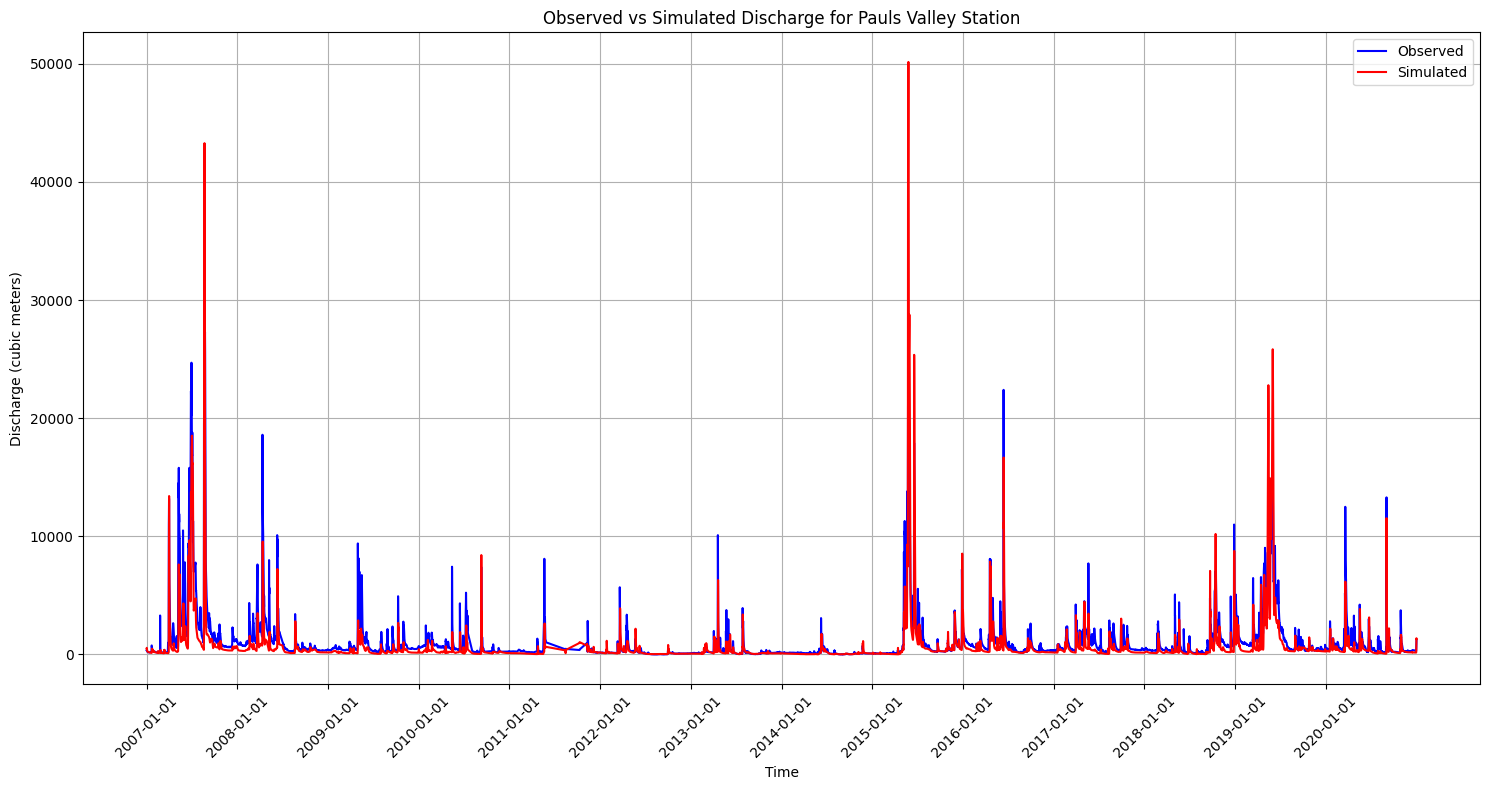

In [12]:
from plot_utils import plot_observed_vs_simulated_time_series

# Plot observed vs simulated discharge time series for Antlers station
plot_observed_vs_simulated_time_series(df_anto_merged, df_anto_merged, 'Antlers')

# Plot observed vs simulated discharge time series for Pauls Valley station
plot_observed_vs_simulated_time_series(df_plvo_merged, df_plvo_merged, 'Pauls Valley')


In [13]:

# Calculate NSE for Antlers station
nse_antlers = nse_utils.calculate_nse_for_station(df_anto_merged, df_anto_merged)

# Calculate NSE for Pauls Valley station
nse_pauls_valley = nse_utils.calculate_nse_for_station(df_plvo_merged, df_plvo_merged)

print("NSE for Antlers station:", nse_antlers)
print("NSE for Pauls Valley station:", nse_pauls_valley)


NSE for Antlers station: 0.724296028334011
NSE for Pauls Valley station: 0.6116674437568762


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from nse_utils import calculate_nse

def prepare_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

def train_lstm_model(data, n_steps, epochs=10, units=10):
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    # Prepare the dataset for LSTM
    X, y = prepare_dataset(scaled_data, n_steps)

    # Reshape input to be 3D [samples, timesteps, features] for LSTM
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Define the LSTM model architecture
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(n_steps, 1)))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    model.fit(X, y, epochs=epochs, batch_size=32)

    return model, scaler

def evaluate_lstm_model(model, scaler, data, n_steps):
    # Normalize the data
    scaled_data = scaler.transform(data.values.reshape(-1, 1))

    # Prepare the dataset for evaluation
    X, y = prepare_dataset(scaled_data, n_steps)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Predict the discharge values using the trained model
    simulated_discharge = model.predict(X)

    # Calculate NSE
    nse = calculate_nse(y.flatten(), simulated_discharge.flatten())

    return nse




In [15]:
# Train and evaluate LSTM model for Pauls Valley station
model_plvo, scaler_plvo = train_lstm_model(df_plvo_merged['Sim_Discharge'], n_steps=30)
nse_plvo = evaluate_lstm_model(model_plvo, scaler_plvo, df_plvo_merged['Sim_Discharge'], n_steps=30)
print("NSE for Pauls Valley station:", nse_plvo)

Epoch 1/10
544/544 [==============================] - 4s 6ms/step - loss: 5.9044e-04
Epoch 2/10
544/544 [==============================] - 3s 5ms/step - loss: 2.0522e-04
Epoch 3/10
544/544 [==============================] - 3s 5ms/step - loss: 1.4464e-04
Epoch 4/10
544/544 [==============================] - 3s 5ms/step - loss: 1.1057e-04
Epoch 5/10
544/544 [==============================] - 3s 6ms/step - loss: 9.5251e-05
Epoch 6/10
544/544 [==============================] - 3s 5ms/step - loss: 8.1385e-05
Epoch 7/10
544/544 [==============================] - 3s 5ms/step - loss: 8.0222e-05
Epoch 8/10
544/544 [==============================] - 3s 5ms/step - loss: 6.8958e-05
Epoch 9/10
544/544 [==============================] - 3s 5ms/step - loss: 7.1816e-05
Epoch 10/10
544/544 [==============================] - 1s 2ms/step
NSE for Pauls Valley station: 0.9731556574379425


In [16]:
# Train and evaluate LSTM model for Antlers station
model_anto, scaler_anto = train_lstm_model(df_anto_merged['Sim_Discharge'], n_steps=30)
nse_anto = evaluate_lstm_model(model_anto, scaler_anto, df_anto_merged['Sim_Discharge'], n_steps=30)
print("NSE for Antlers station:", nse_anto)

Epoch 1/10
577/577 [==============================] - 4s 6ms/step - loss: 7.3265e-04
Epoch 2/10
577/577 [==============================] - 3s 5ms/step - loss: 3.0935e-04
Epoch 3/10
577/577 [==============================] - 3s 6ms/step - loss: 1.7927e-04
Epoch 4/10
577/577 [==============================] - 3s 5ms/step - loss: 1.4432e-04
Epoch 5/10
577/577 [==============================] - 3s 5ms/step - loss: 1.3157e-04
Epoch 6/10
577/577 [==============================] - 3s 5ms/step - loss: 1.2617e-04
Epoch 7/10
577/577 [==============================] - 3s 6ms/step - loss: 1.2290e-04
Epoch 8/10
577/577 [==============================] - 3s 5ms/step - loss: 1.1663e-04
Epoch 9/10
577/577 [==============================] - 3s 5ms/step - loss: 1.1327e-04
Epoch 10/10
577/577 [==============================] - 1s 2ms/step
NSE for Antlers station: 0.962667478379752


In [17]:
df_anto_merged.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7336200,2007-01-01 06:00:00+00:00,CST,13900.0,A:[91],8404
1,USGS,7336200,2007-01-01 12:00:00+00:00,CST,10100.0,A:[91],7821
2,USGS,7336200,2007-01-01 18:00:00+00:00,CST,6870.0,A:[91],7006
3,USGS,7336200,2007-01-02 00:00:00+00:00,CST,5080.0,A:[91],6090
4,USGS,7336200,2007-01-02 06:00:00+00:00,CST,4180.0,A:[91],5257


In [18]:
df_plvo_merged

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7328500,2007-01-01 06:00:00+00:00,CST,355.0,A:[91],504
1,USGS,7328500,2007-01-01 12:00:00+00:00,CST,351.0,A:[91],556
2,USGS,7328500,2007-01-01 18:00:00+00:00,CST,329.0,A:[91],561
3,USGS,7328500,2007-01-02 00:00:00+00:00,CST,317.0,A:[91],514
4,USGS,7328500,2007-01-02 06:00:00+00:00,CST,310.0,A:[91],450
...,...,...,...,...,...,...,...
17402,USGS,7328500,2020-12-30 18:00:00+00:00,CST,451.0,A:e,294
17403,USGS,7328500,2020-12-31 00:00:00+00:00,CST,638.0,A:e,728
17404,USGS,7328500,2020-12-31 06:00:00+00:00,CST,761.0,A:e,1175
17405,USGS,7328500,2020-12-31 12:00:00+00:00,CST,959.0,A:e,1374


In [ ]:
# Convert 'datetime' column to datetime format
df_anto_merged['datetime'] = pd.to_datetime(df_anto_merged['datetime'])
df_plvo_merged['datetime'] = pd.to_datetime(df_plvo_merged['datetime'])

# Remove timezone information
df_anto_merged['datetime'] = df_anto_merged['datetime'].dt.tz_localize(None)
df_plvo_merged['datetime'] = df_plvo_merged['datetime'].dt.tz_localize(None)

In [19]:


# Defining the time periods for training, validation, and test sets
train_start, train_end = '2007-01-01', '2015-12-31'
val_start, val_end = '2016-01-01', '2018-12-31'
test_start, test_end = '2019-01-01', '2020-12-31'


# Convert train_start, train_end, val_start, val_end, test_start, and test_end to datetime objects
train_start = pd.Timestamp(train_start)
train_end = pd.Timestamp(train_end)
val_start = pd.Timestamp(val_start)
val_end = pd.Timestamp(val_end)
test_start = pd.Timestamp(test_start)
test_end = pd.Timestamp(test_end)

# Filter the dataframes to obtain subsets for training, validation, and testing for Antlers station
df_anto_train = df_anto_merged[(df_anto_merged['datetime'] >= train_start) & (df_anto_merged['datetime'] <= train_end)]
df_anto_val = df_anto_merged[(df_anto_merged['datetime'] >= val_start) & (df_anto_merged['datetime'] <= val_end)]
df_anto_test = df_anto_merged[(df_anto_merged['datetime'] >= test_start) & (df_anto_merged['datetime'] <= test_end)]

# Filter the dataframes to obtain subsets for training, validation, and testing for Pauls Valley station
df_plvo_train = df_plvo_merged[(df_plvo_merged['datetime'] >= train_start) & (df_plvo_merged['datetime'] <= train_end)]
df_plvo_val = df_plvo_merged[(df_plvo_merged['datetime'] >= val_start) & (df_plvo_merged['datetime'] <= val_end)]
df_plvo_test = df_plvo_merged[(df_plvo_merged['datetime'] >= test_start) & (df_plvo_merged['datetime'] <= test_end)]


In [20]:
# Train the LSTM models for each station using the training data
model_anto, scaler_anto = train_lstm_model(df_anto_train['Sim_Discharge'], n_steps=30)
model_plvo, scaler_plvo = train_lstm_model(df_plvo_train['Sim_Discharge'], n_steps=30)


Epoch 1/10
370/370 [==============================] - 3s 5ms/step - loss: 0.0019
Epoch 2/10
370/370 [==============================] - 2s 5ms/step - loss: 9.0697e-04
Epoch 3/10
370/370 [==============================] - 2s 5ms/step - loss: 6.3778e-04
Epoch 4/10
370/370 [==============================] - 2s 5ms/step - loss: 4.3170e-04
Epoch 5/10
370/370 [==============================] - 2s 6ms/step - loss: 2.9594e-04
Epoch 6/10
370/370 [==============================] - 2s 6ms/step - loss: 2.2742e-04
Epoch 7/10
370/370 [==============================] - 2s 5ms/step - loss: 1.9973e-04
Epoch 8/10
370/370 [==============================] - 2s 5ms/step - loss: 1.6054e-04
Epoch 9/10
370/370 [==============================] - 2s 5ms/step - loss: 1.5230e-04
Epoch 10/10
370/370 [==============================] - 2s 5ms/step - loss: 1.4547e-04
Epoch 1/10
334/334 [==============================] - 3s 6ms/step - loss: 9.0727e-04
Epoch 2/10
334/334 [==============================] - 2s 6ms/step - 

In [21]:
# Evaluate the trained models using the validation data
nse_anto = evaluate_lstm_model(model_anto, scaler_anto, df_anto_val['Sim_Discharge'], n_steps=30)
nse_plvo = evaluate_lstm_model(model_plvo, scaler_plvo, df_plvo_val['Sim_Discharge'], n_steps=30)

print("NSE for Antlers station:", nse_anto)
print("NSE for Pauls Valley station:", nse_plvo)


122/122 [==============================] - 0s 2ms/step
NSE for Antlers station: 0.9590679872032697
NSE for Pauls Valley station: 0.8758695054560748
